***
##### This module defines a Support Vector Regression (SVR) model, whose kernel function is radial basis fucntion. The main task is to train a SVR model to do stock price forecasting. 

##### This module split the original data set into training set and test set. After training the SVR model with the training set, this module computes the root mean square error (RMSE) and the coefficient of determination (R<sup>2</sup>) in the test set. In order to improve the data visualization, this module also plots the actual stock price and the predicted stock price on the same figure.
 
##### Authored by Menghong Huang and Zhaosheng Li.
***

## Import Dependencies

In [1]:
%matplotlib inline
import numpy as np
from sklearn.svm import SVR     # Support Vector Regression
import matplotlib.pyplot as plt 
import pandas as pd             # For loading the data into dataframe

# For calculating RMSE, the usage refers to https://stackoverflow.com/a/18623635 
from sklearn.metrics import mean_squared_error
from math import sqrt

# For calculating the coefficient of determination (R^2), 
# the usage refers to https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
from sklearn.metrics import r2_score

import matplotlib.dates as mdates # For converting the 'date' into numerical variable
import joblib  # For saving and loading model

## Load data into dataframe

In [2]:
df = pd.read_csv("data/GME_stock.csv")

In [3]:
df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2002-02-13,9.625,10.060,9.525,10.050,19054000,6.766666
1,2002-02-14,10.175,10.195,9.925,10.000,2755400,6.733003
2,2002-02-15,10.000,10.025,9.850,9.950,2097400,6.699336
3,2002-02-19,9.900,9.900,9.375,9.550,1852600,6.430017
4,2002-02-20,9.600,9.875,9.525,9.875,1723200,6.648838


In [4]:
df.tail()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
4768,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300,65.010002
4769,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000,76.790001
4770,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000,147.979996
4771,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700,347.510010
4772,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800,193.600006


## Split the dataframe into training set and test set

In [5]:
training_data = df[0:3773]  # from index 0 to 3772, NOT 3773
test_data = df[3773:4773]   # from index 3773 to 4773

### Set up the 'date'

In [6]:
training_data_date = pd.to_datetime(training_data['date'])
training_data_date = training_data_date.map(mdates.date2num).tolist()
test_data_date = pd.to_datetime(test_data['date'])
test_data_date = test_data_date.map(mdates.date2num).tolist()

In [36]:
# Convert the date into 1D vector, which can be fed into the support vector regression model
training_data_date = np.reshape(training_data_date, (len(training_data_date), 1))
test_data_date = np.reshape(test_data_date, (len(test_data_date), 1))

### Set up the 'close price'

In [7]:
training_data_close_price = training_data['close_price'].tolist()
test_data_close_price = test_data['close_price'].tolist()

## Load the SVR model

In [8]:
SVR_RBF = joblib.load("SVR_Model/RBF_model.pkl")

## Build SVR model

##### If you have already loaded the SVR model in the `Load the SVR model` section, please feel free to skip this step

In [11]:
SVR_RBF = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)

## Train the SVR model

##### If you have already loaded the SVR model in the `Load the SVR model` section, please feel free to skip this step

In [13]:
SVR_RBF.fit(training_data_date, training_data_close_price)

SVR(C=1000.0, gamma=0.1)

In [17]:
# Save the trained SVR model
joblib.dump(SVR_RBF, "SVR_Model/RBF_model.pkl")

['SVR_Model/RBF_model.pkl']

## Plot the actual price and predicted price in the training set

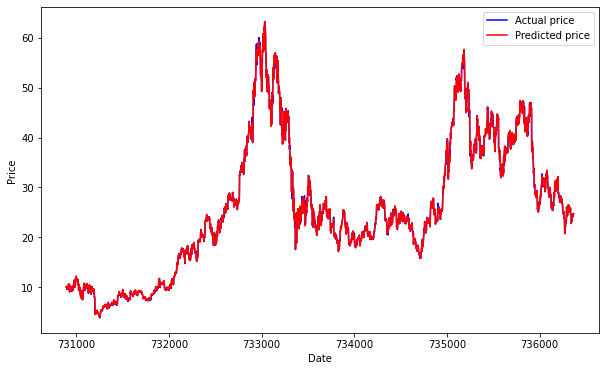

In [37]:
plt.figure(figsize = (10,6))
plt.plot(training_data_date, training_data_close_price, color= 'blue', label= 'Actual price')
plt.plot(training_data_date, SVR_RBF.predict(training_data_date), color= 'red', label= 'Predicted price') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Plot the actual price and predicted price in the test set

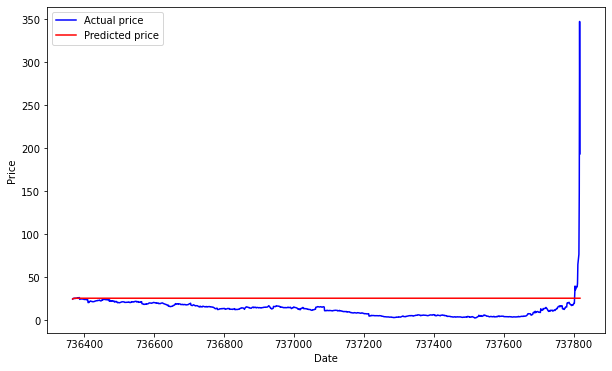

In [38]:
plt.figure(figsize = (10,6))
plt.plot(test_data_date, test_data_close_price, color= 'blue', label= 'Actual price')
plt.plot(test_data_date, SVR_RBF.predict(test_data_date), color= 'red', label= 'Predicted price') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Calculate the root mean square error

In [39]:
RMSE = sqrt(mean_squared_error(test_data_close_price, SVR_RBF.predict(test_data_date)))
print('The root mean square error (RMSE) for SVR model is', RMSE)

The root mean square error (RMSE) for SVR model is 19.16717854481199


## Calculate the coefficient of determination (R<sup>2</sup>)

In [40]:
R_2 = r2_score(test_data_close_price, SVR_RBF.predict(test_data_date))
print('The coefficient of determination (R^2) for SVR model is', R_2)

The coefficient of determination (R^2) for SVR model is -0.7075002197397231


**Conclusion:** According to https://stats.stackexchange.com/a/12991, R<sup>2</sup> is negative only when the training model does not follow the trend of the data, and the model fits the data even worse than a horizontal line. Hence, using the SVR model to do stock price forecasting does not lead to an expected result.